![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

filename_features = "UCI HAR Dataset/features.txt"
filename_labels = "UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "UCI HAR Dataset/train/y_train.txt"

filename_subtest = "UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "UCI HAR Dataset/test/X_test.txt"
filename_ytest = "UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_18080\2967980793.py:22: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Fernanda\AppData\Local\Temp\ipykernel_18080\2967980793.py:25: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Fernanda\AppData\Local\Temp\ipykernel_18080\2967980793.py:29: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [18]:
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001)

In [19]:
%%time
clf = clf.fit(X_train, y_train)

CPU times: total: 4.33 s
Wall time: 5.14 s


In [20]:
clf.score(X_train,y_train)

0.9757889009793254

In [21]:
clf.score(X_test,y_test)

0.8812351543942993

- Acurácia na base Treino alta e cai consideravelmente na base teste, pode indicar um overfitting dos dados.
- Tempo de processamento relativamente baixo, mas devemos ter uma base de comparação.

## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [22]:
%%time
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

CPU times: total: 3.94 s
Wall time: 2.47 s


In [23]:
n = 1

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1
0,-5.520280
1,-5.535350
2,-5.474988
3,-5.677232
4,-5.748749


In [28]:
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001)

In [25]:
%%time

clf = clf.fit(pc_train, y_train)

CPU times: total: 62.5 ms
Wall time: 67.9 ms


In [26]:
clf.score(pc_train, y_train)

0.499727965179543

In [27]:
clf.score(pc_test,y_test)

0.45707499151679676

- Acurácia da base Treino caiu bastante comparada com a do exercício anterior, o tempo de processamento também foi muito menor.

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [30]:
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

In [31]:
%%time
lista = [1, 2, 5, 10, 50]
score_train = []
score_test = []

for n in lista:
    colunas = ['cp'+str(x+1) for x in list(range(n))]

    pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
    pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)
    
    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001)
    
    clf = clf.fit(pc_train, y_train)
    
    s_tr = clf.score(pc_train, y_train)
    score_train.append(s_tr)
    
    s_te = clf.score(pc_test,y_test)
    score_test.append(s_te)

CPU times: total: 688 ms
Wall time: 694 ms


In [32]:
d = {'qtd_componentes': lista, 'score_train': score_train, 'score_test': score_test}
df = pd.DataFrame(d)

In [33]:
df

,qtd_componentes,score_train,score_test
0,1,0.499728,0.457075
1,2,0.612758,0.584662
2,5,0.846028,0.788938
3,10,0.892682,0.823889
4,50,0.919342,0.823210


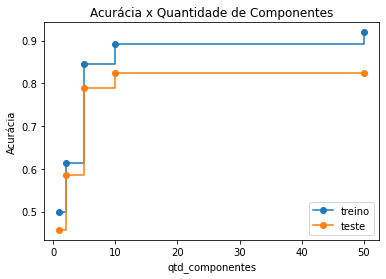

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel("qtd_componentes")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Quantidade de Componentes")
ax.plot(df['qtd_componentes'], df['score_train'], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(df['qtd_componentes'], df['score_test'], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

In [35]:
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

In [36]:
n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)
    
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001)

In [37]:
%%time

clf = clf.fit(pc_train, y_train)

CPU times: total: 78.1 ms
Wall time: 73.9 ms


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

No inicio conforme aumentamos o número de componentes aumentamos consideravelmente a acurácia tanto na base de testes quanto na base de treino, percebemos que em 10 componentes a acurácia de teste se mantém praticamente constante e a da base treino continua aumentando. Percebemos que não precisamos utilizar muitos componentes para chegarmos em uma acurácia de testes boa, porém também não podemos usar quase nenhum componente, pois também prejudicariamos o modelo.